<a href="https://colab.research.google.com/github/titaniumsyrup/learners_space/blob/week3/OpenCVtask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Define paths
import os
zip_file_path = '/content/images.zip'
extract_to = '/content/img'

# Ensure the extraction directory exists
os.makedirs(extract_to, exist_ok=True)

# Unzip the file
!unzip -q {zip_file_path} -d {extract_to}

#print("Extraction completed!")

# List the extracted files to verify
extracted_files = os.listdir(extract_to)
#print(f"Extracted files: {extracted_files}")


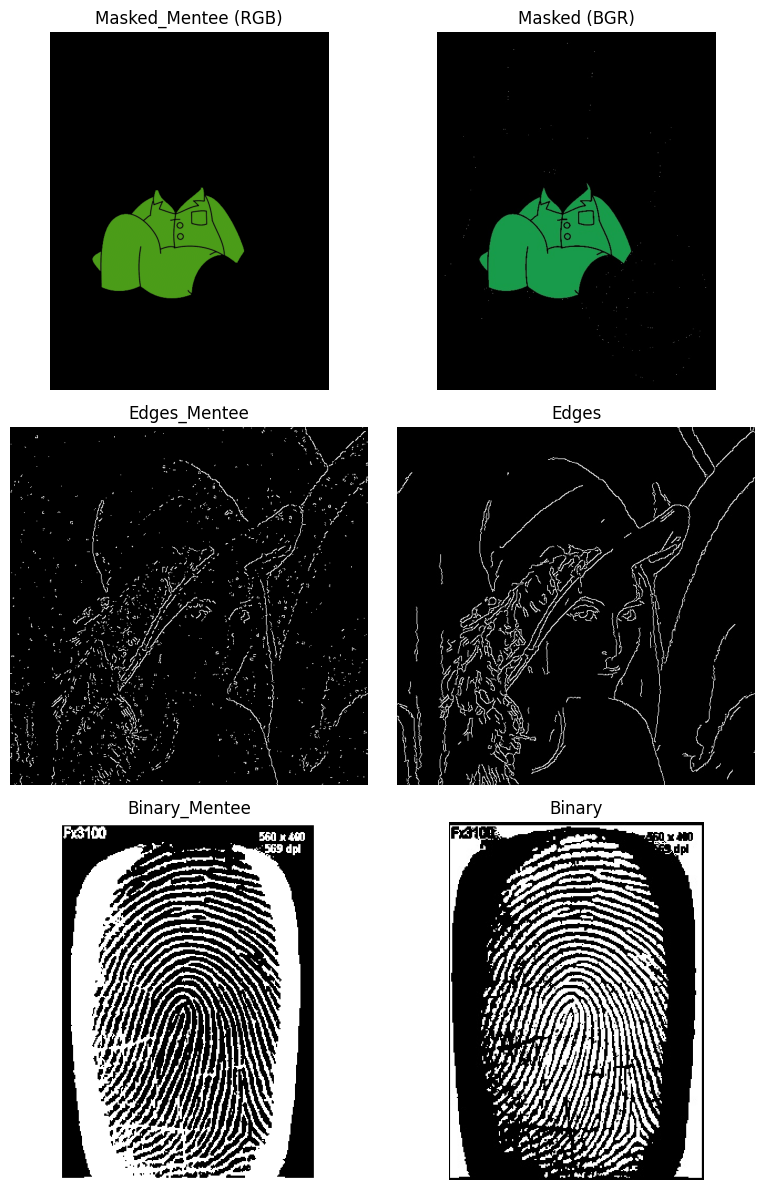

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load images
cartoon = cv2.imread("/content/img/cartoon.bmp")
cartoon_y = cv2.imread("/content/img/cartoon_y.jpg")
girl = cv2.imread("/content/img/girl.png", cv2.IMREAD_GRAYSCALE)
girl_y = cv2.imread("/content/img/girl_y.jpg", cv2.IMREAD_GRAYSCALE)
fingerprint = cv2.imread("/content/img/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/img/fingerprint_y.jpg")

# Convert cartoon image to HSV and create mask
cartoon_hsv = cv2.cvtColor(cartoon, cv2.COLOR_BGR2HSV)
lower_green = np.array([40, 50, 50])
upper_green = np.array([90, 255, 255])
mask_green = cv2.inRange(cartoon_hsv, lower_green, upper_green)

# Morphological transformations to clean the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Apply mask to cartoon image
cartoon_y_mentee = cv2.bitwise_and(cartoon, cartoon, mask=mask)
cartoon_y_mentee_rgb = cv2.cvtColor(cartoon_y_mentee, cv2.COLOR_BGR2RGB)

# Edge detection for girl image with adjusted thresholds
girl_blur = cv2.GaussianBlur(girl, (5, 5), 0)
girl_y_mentee = cv2.Canny(girl_blur, 184, 190)

# Binary thresholding for fingerprint image
fingerprint_gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, fingerprint_y_mentee = cv2.threshold(fingerprint_gray, 128, 255, cv2.THRESH_BINARY)

# Convert fingerprint_y to RGB for display consistency
fingerprint_y_rgb = cv2.cvtColor(fingerprint_y, cv2.COLOR_BGR2RGB)

# Plotting the results
fig, axs1 = plt.subplots(3, 2, figsize=(8, 12))

# Cartoon Image
axs1[0, 0].imshow(cartoon_y_mentee_rgb)
axs1[0, 1].imshow(cv2.cvtColor(cartoon_y, cv2.COLOR_BGR2RGB))
axs1[0, 0].axis("off")
axs1[0, 1].axis("off")
axs1[0, 0].set_title("Masked_Mentee (RGB)")
axs1[0, 1].set_title("Masked (BGR)")

# Girl Image
axs1[1, 0].imshow(girl_y_mentee, cmap="gray")
axs1[1, 1].imshow(girl_y, cmap="gray")
axs1[1, 0].axis("off")
axs1[1, 1].axis("off")
axs1[1, 0].set_title("Edges_Mentee")
axs1[1, 1].set_title("Edges")

# Fingerprint Image
axs1[2, 0].imshow(fingerprint_y_mentee, cmap="gray")
axs1[2, 1].imshow(fingerprint_y_rgb)
axs1[2, 0].axis("off")
axs1[2, 1].axis("off")
axs1[2, 0].set_title("Binary_Mentee")
axs1[2, 1].set_title("Binary")

plt.tight_layout()
plt.show()
